In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy.stats import zscore 

import pingouin as pg

### Preprocessing

In [2]:
def season(x):
    summer = [12,1,2]
    autumn = [3,4,5]
    winter = [6,7,8]
    spring = [9,10,11]
    if x in summer:
        return 'summer'
    elif x in autumn:
        return 'autumn'
    elif x in winter:
        return 'winter'
    elif x in spring:
        return 'spring'
    
def distance(y):
    if 0 < y <= 5:
        return 'very near'
    elif 5 < y <= 10:
        return 'near'
    elif 10 < y <= 15:
        return 'far'
    else:
        return 'very far'

D:\Anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
housing = pd.read_csv('Melbourne_housing_FULL.csv')
housing

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34852,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34853,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34854,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
housing = housing.dropna()

In [5]:
housing['age'] = 2020 - housing['YearBuilt']
housing = housing.drop(['Address', 'SellerG', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'YearBuilt', 'Bedroom2'], axis=1)

<ipython-input-5-c2a819451626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['age'] = 2020 - housing['YearBuilt']


In [6]:
housing['Date'] = pd.to_datetime(housing['Date'])
housing['month'] = housing['Date'].dt.month
housing['season'] = housing['month'].apply(season)
housing['Distance'] = housing['Distance'].apply(distance)
housing.drop(['Method'],axis=1, inplace=True)

r = housing[['Bathroom', 'Rooms', 'Type', 'Car', 'Suburb']]
housing = housing[r.replace(r.stack().value_counts()).gt(10).all(1)]

# EDA

In [7]:
housing

,Suburb,Rooms,Type,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,age,month,season
2,Abbotsford,2,h,1035000.0,2016-04-02,very near,1.0,0.0,156.0,79.0,120.0,4,autumn
4,Abbotsford,3,h,1465000.0,2017-04-03,very near,2.0,0.0,134.0,150.0,120.0,4,autumn
6,Abbotsford,4,h,1600000.0,2016-04-06,very near,1.0,2.0,120.0,142.0,6.0,4,autumn
11,Abbotsford,3,h,1876000.0,2016-07-05,very near,2.0,0.0,245.0,210.0,110.0,7,winter
14,Abbotsford,2,h,1636000.0,2016-08-10,very near,1.0,2.0,256.0,107.0,130.0,8,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34846,Wollert,3,h,500000.0,2018-02-24,very far,2.0,2.0,383.0,118.0,4.0,2,summer
34848,Wollert,3,h,570000.0,2018-02-24,very far,2.0,2.0,404.0,158.0,8.0,2,summer
34852,Yarraville,2,h,888000.0,2018-02-24,near,2.0,1.0,98.0,104.0,2.0,2,summer
34853,Yarraville,2,t,705000.0,2018-02-24,near,1.0,2.0,220.0,120.0,20.0,2,summer


In [8]:
housing.describe()

,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,age,month
count,8338.000000,8.338000e+03,8338.000000,8338.000000,8338.000000,8338.000000,8338.000000,8338.000000
mean,3.077836,1.107430e+06,1.637443,1.668266,496.481650,148.419199,55.073639,6.722955
std,0.956941,6.911578e+05,0.710195,0.947869,789.602971,88.261629,37.549607,2.960255
min,1.000000,1.450000e+05,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,6.450000e+05,1.000000,1.000000,201.000000,99.000000,20.000000,4.000000
50%,3.000000,9.085000e+05,2.000000,2.000000,459.000000,131.000000,50.000000,7.000000
75%,4.000000,1.370000e+06,2.000000,2.000000,650.000000,180.000000,80.000000,9.000000
max,7.000000,9.000000e+06,6.000000,7.000000,37000.000000,3112.000000,824.000000,12.000000


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8338 entries, 2 to 34855
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Suburb        8338 non-null   object        
 1   Rooms         8338 non-null   int64         
 2   Type          8338 non-null   object        
 3   Price         8338 non-null   float64       
 4   Date          8338 non-null   datetime64[ns]
 5   Distance      8338 non-null   object        
 6   Bathroom      8338 non-null   float64       
 7   Car           8338 non-null   float64       
 8   Landsize      8338 non-null   float64       
 9   BuildingArea  8338 non-null   float64       
 10  age           8338 non-null   float64       
 11  month         8338 non-null   int64         
 12  season        8338 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 912.0+ KB


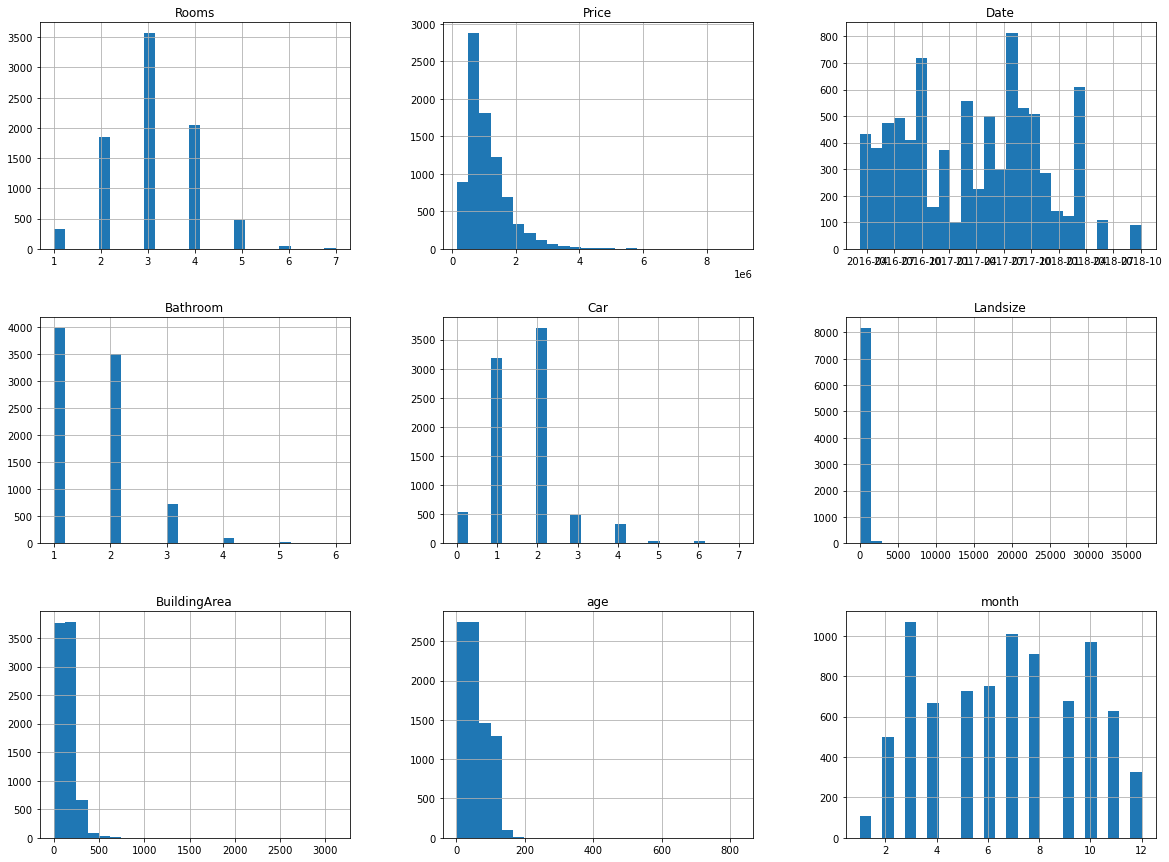

In [10]:
housing.hist(bins=25, figsize=(20,15))
plt.show()

In [11]:
for i in housing.columns:
    x = housing[i].nunique()
    print("Column name is:",i,"and it unique value is:",x)

Column name is: Suburb and it unique value is: 196
Column name is: Rooms and it unique value is: 7
Column name is: Type and it unique value is: 3
Column name is: Price and it unique value is: 1793
Column name is: Date and it unique value is: 77
Column name is: Distance and it unique value is: 4
Column name is: Bathroom and it unique value is: 6
Column name is: Car and it unique value is: 8
Column name is: Landsize and it unique value is: 1197
Column name is: BuildingArea and it unique value is: 568
Column name is: age and it unique value is: 143
Column name is: month and it unique value is: 12
Column name is: season and it unique value is: 4


### Timeseries plot

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


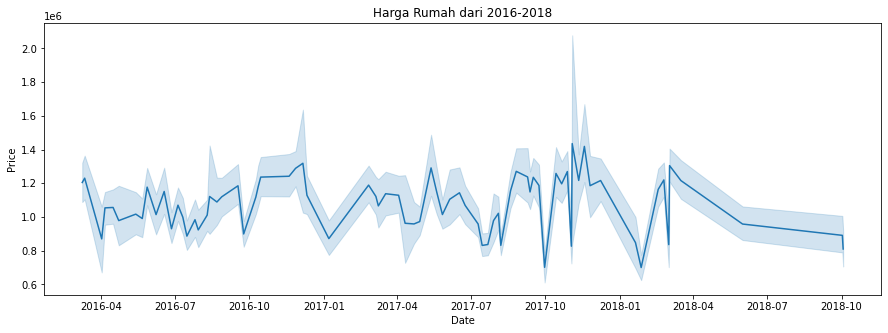

In [12]:
plt.figure(figsize=(15,5))
plt.title('Harga Rumah dari 2016-2018')
sns.lineplot(housing['Date'], housing['Price'])
plt.show()

### Scatterplot

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


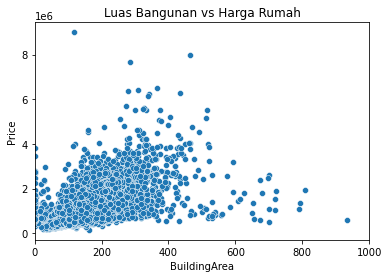

In [34]:
sns.scatterplot(housing['BuildingArea'], housing['Price'])
plt.xlim(0,1000)
plt.title('Luas Bangunan vs Harga Rumah')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


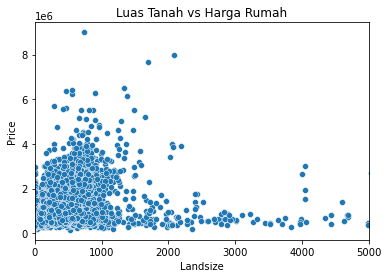

In [35]:
sns.scatterplot(housing['Landsize'], housing['Price'])
plt.xlim(0,5000)
plt.title('Luas Tanah vs Harga Rumah')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


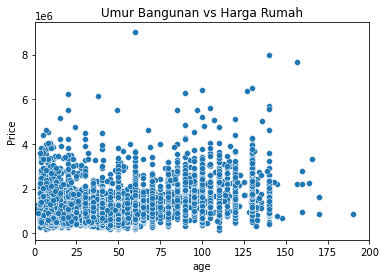

In [36]:
sns.scatterplot(housing['age'], housing['Price'])
plt.xlim(0,200)
plt.title('Umur Bangunan vs Harga Rumah')
plt.show()

### Bar/count plot

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


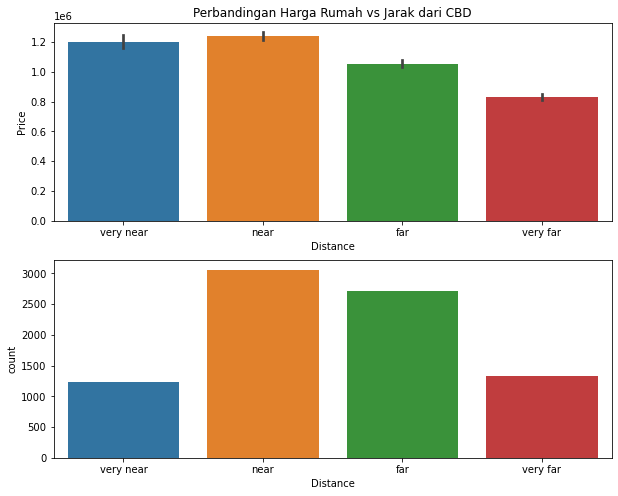

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
sns.barplot(housing['Distance'], housing['Price'], ax=ax1, order=['very near', 'near', 'far', 'very far']).set_title('Perbandingan Harga Rumah vs Jarak dari CBD')
sns.countplot(housing['Distance'], ax=ax2, order=['very near', 'near', 'far', 'very far'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


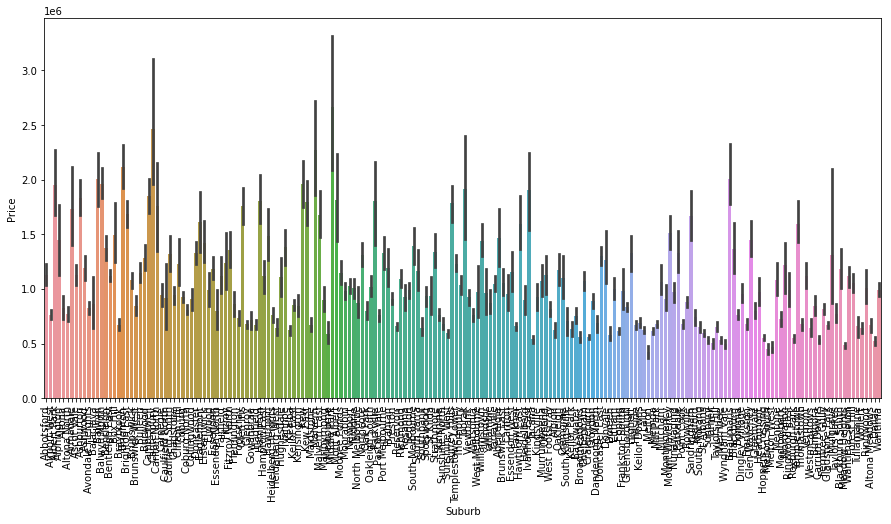

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(housing['Suburb'], housing['Price'])
plt.xticks(rotation=90)
plt.show()

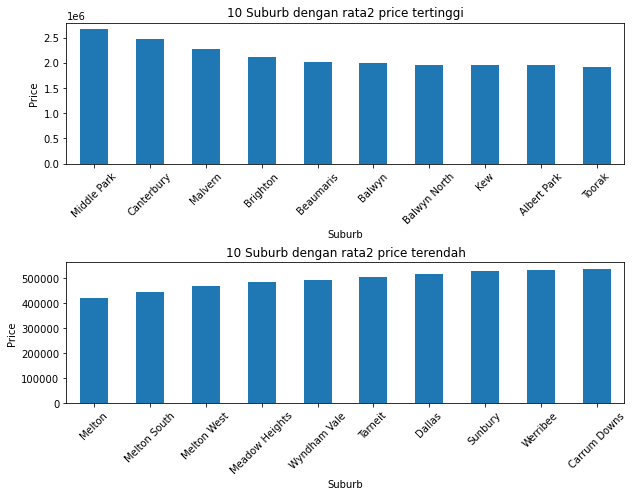

In [18]:
plt.figure(figsize=(10,7))
plt.subplots_adjust(hspace = 0.7)
plt.title('')

plt.subplot(2,1,1)
housing.groupby('Suburb').mean()['Price'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('10 Suburb dengan rata2 price tertinggi')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
housing.groupby('Suburb').mean()['Price'].sort_values().head(10).plot(kind='bar')
plt.title('10 Suburb dengan rata2 price terendah')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


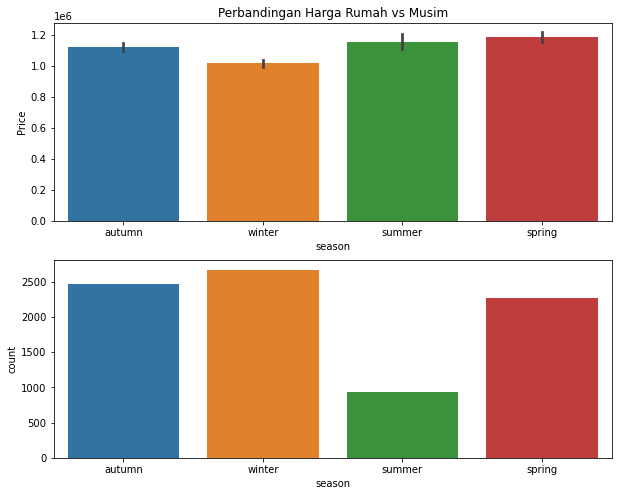

In [40]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
sns.barplot(housing['season'], housing['Price'], ax=ax1).set_title('Perbandingan Harga Rumah vs Musim')
sns.countplot(housing['season'], ax=ax2)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


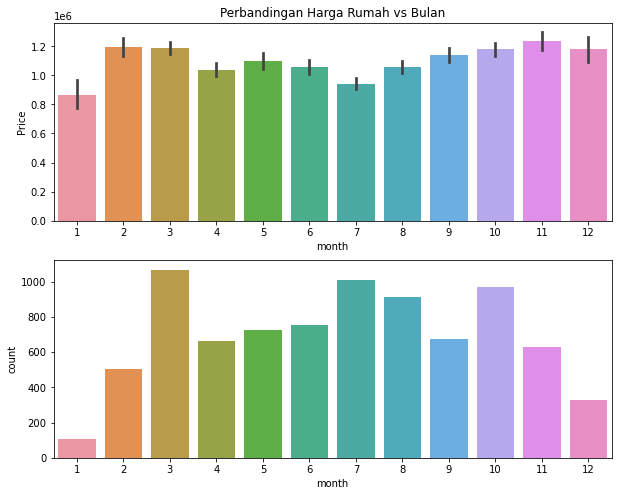

In [39]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
sns.barplot(housing['month'], housing['Price'], ax=ax1).set_title('Perbandingan Harga Rumah vs Bulan')
sns.countplot(housing['month'], ax=ax2)
plt.show()

### Histogram

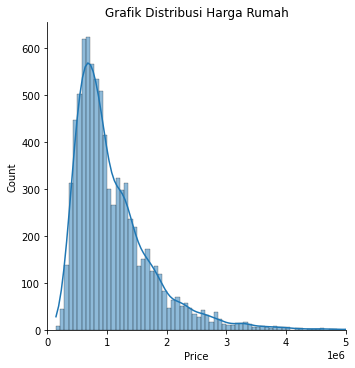

In [21]:
sns.displot(housing['Price'], kde=True)
plt.xlim(0,5000000)
plt.title('Grafik Distribusi Harga Rumah')
plt.show()

In [22]:
housing['Price'].skew()

2.3734265397215477

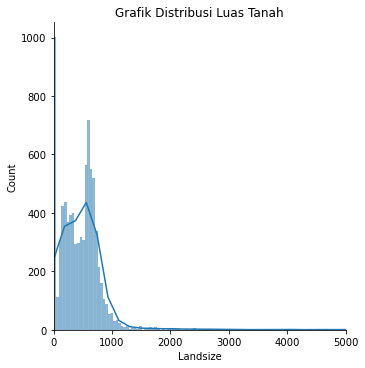

In [23]:
sns.displot(housing['Landsize'], kde=True)
plt.xlim(0,5000)
plt.title('Grafik Distribusi Luas Tanah')
plt.show()

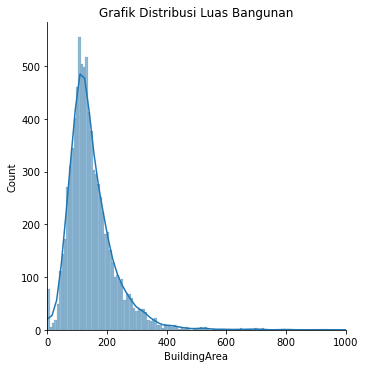

In [24]:
sns.displot(housing['BuildingArea'], kde=True)
plt.xlim(0,1000)
plt.title('Grafik Distribusi Luas Bangunan')
plt.show()

In [25]:
housing['BuildingArea'].skew()

6.729234389471315

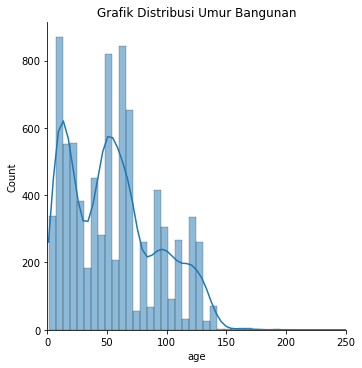

In [26]:
sns.displot(housing['age'], kde=True)
plt.xlim(0,250)
plt.title('Grafik Distribusi Umur Bangunan')
plt.show()

In [27]:
housing['age'].skew()

1.4786379422711207

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


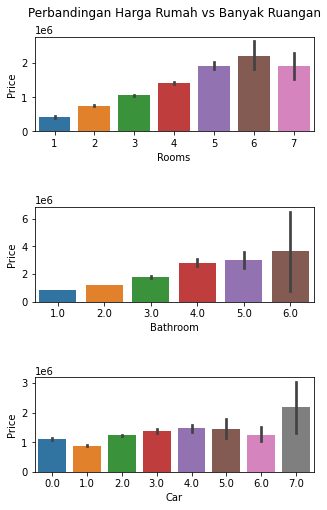

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(5,8))
plt.subplots_adjust(hspace = 0.8)
sns.barplot(housing['Rooms'], housing['Price'],ax=ax1).set_title('Perbandingan Harga Rumah vs Banyak Ruangan', pad=20)
sns.barplot(housing['Bathroom'], housing['Price'],ax=ax2)
sns.barplot(housing['Car'], housing['Price'],ax=ax3)
plt.show()

### Boxplot

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


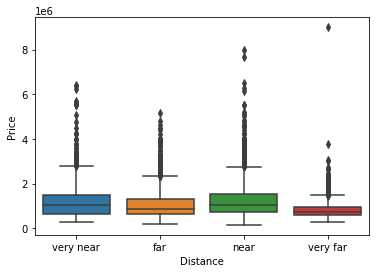

In [29]:
sns.boxplot(housing['Distance'], housing['Price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


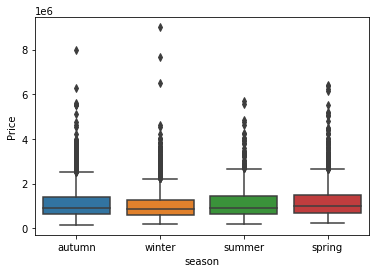

In [30]:
sns.boxplot(housing['season'], housing['Price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


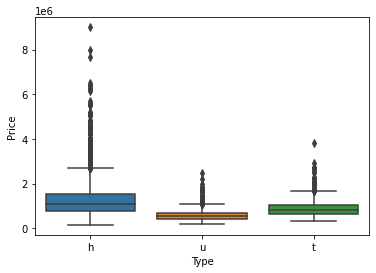

In [31]:
sns.boxplot(housing['Type'], housing['Price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


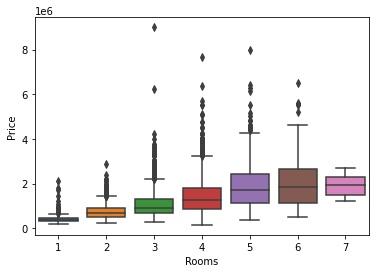

In [32]:
sns.boxplot(housing['Rooms'], housing['Price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


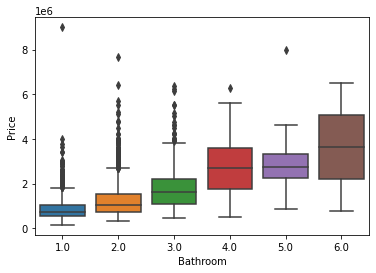

In [33]:
sns.boxplot(housing['Bathroom'], housing['Price'])
plt.show()

In [45]:
from flask import Flask, request, jsonify, render_template
from flask_mysqldb import MySQL

app = Flask(__name__)
app.config['MYSQL_USER'] = 'root'
app.config['MYSQL_PASSWORD'] = 'blueprint23'
app.config['MYSQL_HOST'] = '127.0.0.1'
app.config['MYSQL_DB'] = 'melbourne'
app.config['MYSQL_PORT'] = 3306

app.config['MYSQL_CURSORCLASS'] = 'DictCursor'
app.config['JSON_SORT_KEYS'] = False

# object untuk membuat koneksi terhadap mysql
mysql = MySQL(app)

In [47]:
cur = mysql.connection.cursor()
sql = f"select * from housing order by id desc limit 1;"
cur.execute(sql)
data = cur.fetchall()

AttributeError: 'NoneType' object has no attribute 'cursor'